In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from termcolor import colored
import pickle

In [2]:
data = pd.read_csv('../data.csv')

In [3]:
Y = data['class']
X = data.drop('class', axis=1)
feature_names = X.columns

In [4]:
Y.replace("g", 0, inplace=True)
Y.replace("h", 1, inplace=True)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [16]:
from sklearn.metrics import classification_report

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    data = pd.DataFrame(confusion_matrix(y, y_pred), columns=['g', 'h'], index=['g', 'h'])
    _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=['g', 'h'], yticklabels = ['g','h'], cmap = plt.cm.Reds)
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['B', 'M'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


In [8]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=41)

In [9]:
rfc.fit(X_train, Y_train) # treninranje modela

RandomForestClassifier(class_weight='balanced', random_state=41)

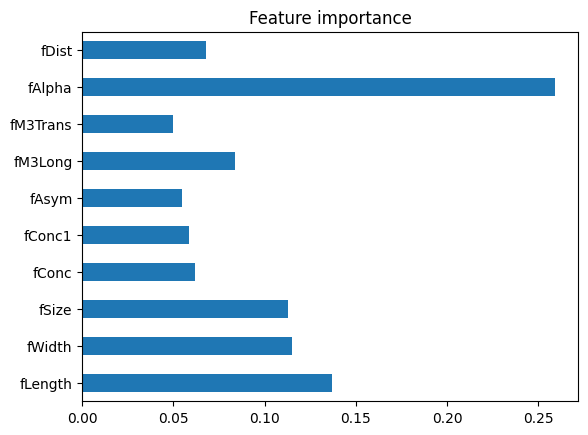

In [11]:
pd.Series(rfc.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9249
           1       1.00      1.00      1.00      5016

    accuracy                           1.00     14265
   macro avg       1.00      1.00      1.00     14265
weighted avg       1.00      1.00      1.00     14265

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


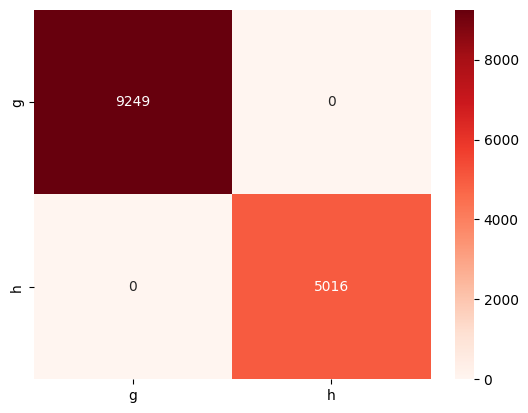

In [17]:
report(rfc, X_train, Y_train)

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3083
           1       0.89      0.76      0.82      1672

    accuracy                           0.88      4755
   macro avg       0.89      0.86      0.87      4755
weighted avg       0.88      0.88      0.88      4755

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


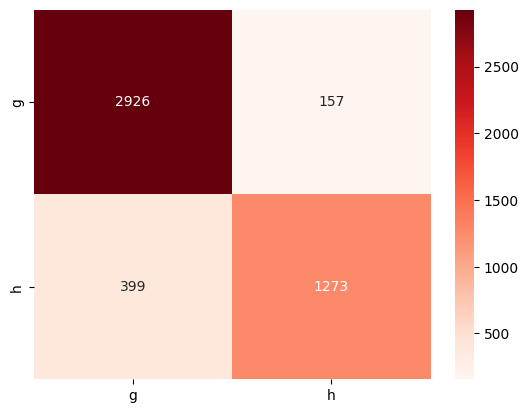

In [18]:
report(rfc, X_test, Y_test, "test")

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [20, 50, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15],
    'min_samples_leaf' : [5, 10, 25]
}

In [23]:
estimator = GridSearchCV(rfc, param_grid=params, scoring = 'roc_auc', cv = 3, verbose=4) 

In [24]:
estimator.fit(X_train, Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=20;, score=0.919 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=20;, score=0.921 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=20;, score=0.919 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=50;, score=0.922 total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=50;, score=0.922 total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=50;, score=0.922 total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=150;, score=0.923 total time=   3.2s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_leaf=5, n_estimators=150;, score=0.924 total time=   3.1s
[CV 3/3] END criterion=gini, max_depth=1

[CV 1/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=20;, score=0.921 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=20;, score=0.920 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=20;, score=0.920 total time=   0.5s
[CV 1/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=50;, score=0.923 total time=   1.3s
[CV 2/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=50;, score=0.922 total time=   1.5s
[CV 3/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=50;, score=0.922 total time=   5.9s
[CV 1/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=150;, score=0.922 total time=  17.5s
[CV 2/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators=150;, score=0.924 total time=  17.7s
[CV 3/3] END criterion=entropy, max_depth=10, min_samples_leaf=5, n_estimators

[CV 3/3] END criterion=entropy, max_depth=15, min_samples_leaf=25, n_estimators=200;, score=0.919 total time=   5.5s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=41),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 10, 25],
                         'n_estimators': [20, 50, 150, 200]},
             scoring='roc_auc', verbose=4)

In [25]:
estimator.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [26]:
estimator.best_score_

0.928635825623978

In [27]:
rfc_cv = estimator.best_estimator_

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9249
           1       0.93      0.90      0.91      5016

    accuracy                           0.94     14265
   macro avg       0.94      0.93      0.93     14265
weighted avg       0.94      0.94      0.94     14265

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


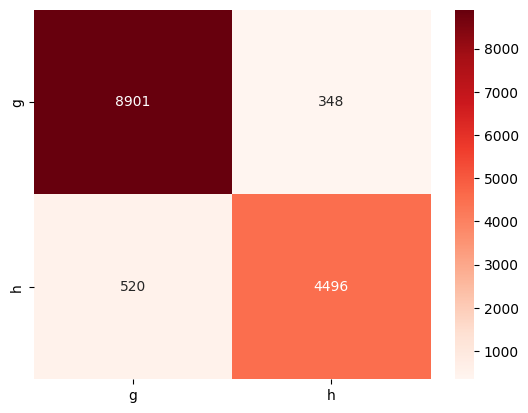

In [28]:
report(rfc_cv, X_train, Y_train)

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3083
           1       0.85      0.80      0.83      1672

    accuracy                           0.88      4755
   macro avg       0.87      0.86      0.87      4755
weighted avg       0.88      0.88      0.88      4755

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


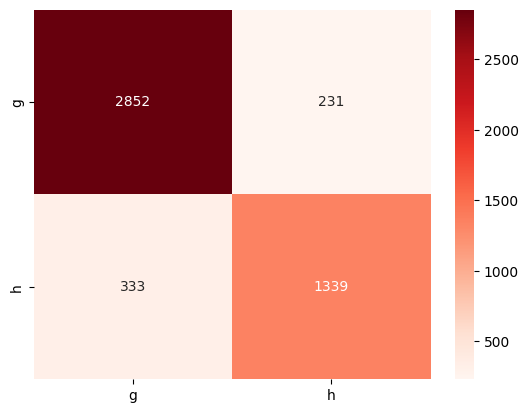

In [29]:
report(rfc_cv, X_test, Y_test, "test")

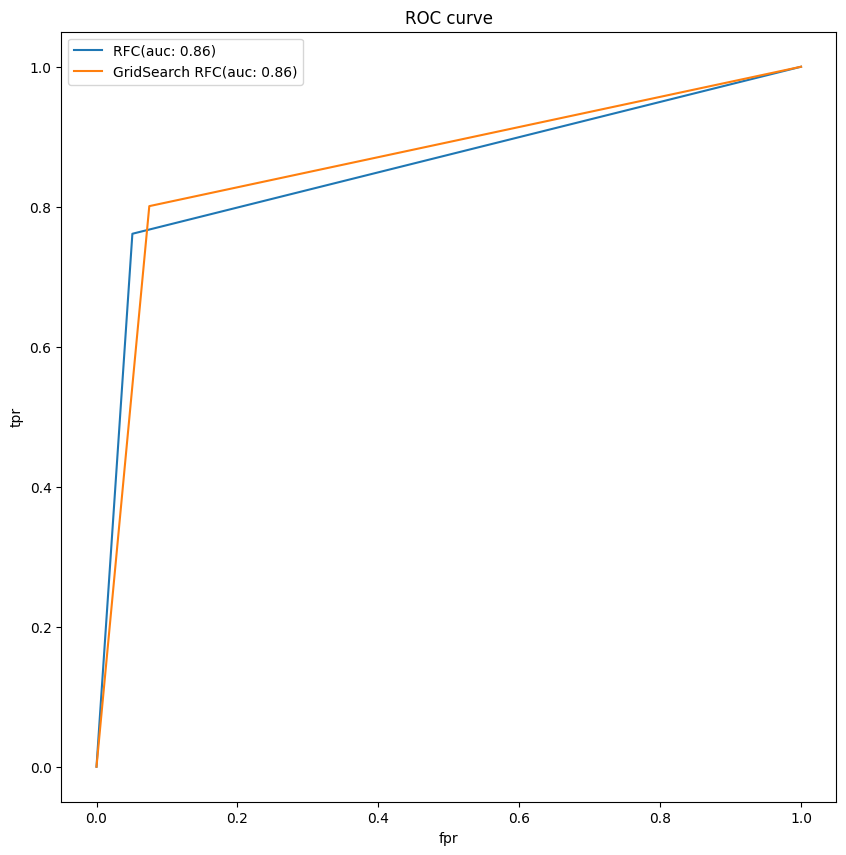

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [rfc, rfc_cv]
model_names = ['RFC', 'GridSearch RFC']

plt.figure(figsize=(10, 10))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC curve")
plt.legend()
plt.show()

In [32]:
with open('RFC.pkl', 'wb') as file:  
    pickle.dump(rfc_cv, file)